In [1]:
import tensorflow as tf
from tensorflow import keras

# With Dense Layer

In [2]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images, test_images = training_images/255.0, test_images/255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5)

test = model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2618 - accuracy: 0.9258
Epoch 2/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1154 - accuracy: 0.9655
Epoch 3/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0793 - accuracy: 0.9764
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0596 - accuracy: 0.9815
Epoch 5/5
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0800 - accuracy: 0.9768


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# With Convolutional Neural Network

In [10]:
mnist_hw = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist_hw.load_data()
training_images, test_images = training_images/255.0, test_images/255.0
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu, input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs = 5)
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

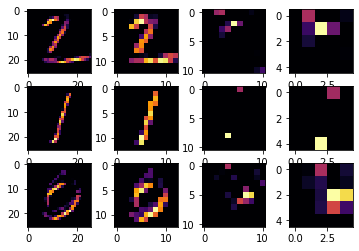

In [24]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=1
SECOND_IMAGE=2
THIRD_IMAGE=3
CONVOLUTION_NUMBER = 5
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## 